### 1.1
What is the value of $\sqrt{2}^{\sqrt{2}^{{\sqrt{2}^{...}}}}$?

The solution can be found by...

Below is the solution using Python.

In [2]:
import math
exponent = 1
for n in range(0, 1000):
    exponent = math.sqrt(2)**exponent
print exponent

2.0


### 3.1
You have a bag with two coins. One will come up heads 40% of the time, and the other will come up heads 60%. You pick a coin randomly, flip it and get a head. What is the probability it will be heads on the next flip?

In [1]:
import numpy as np
# Assume 0 = tails, 1  heads
class Coin(object):
    def __init__(self,p):
        self.prob_heads = p
    def flip_is_head(self):
        return np.random.random() < self.prob_heads

class Bag_of_coins():
    def __init__(self):
        self.coins=[]
    def add_coin(self,coin):
        self.coins.append(coin)
    def pick_random_coin(self,coin):
        return np.random.choice(self.coins)





0.525679159231


### 3.1 Object-oriented version

Here we solve the same problem, but introducing objects to Python.

A simplistic approach to OO design is to identify the nouns in the problem description, and consider those to be potential *classes*. A class is a template, sort of like a cookie cutter for stamping out identical objects, ready for use.

In this problem, we see **coin** and **purse** in the problem description. So let's make them into classes. 

The *methods* of a class represent the actions we expect of the objects created from the class.

In [27]:
import numpy as np

class Coin(object): #we capitalize the names of classes.
    # always define a constructor, so that we can 
    # create instances (objects) of Coin:
    def __init__(self, probHeads):
        self.probHeads = probHeads
        
    def flipIsHead(self):
        return np.random.random() < self.probHeads
    
    def nextNFlipsAreHeads(self, n):
        for i in range(n):
            if not self.flipIsHead():# i.e. it's a Tail!
                return False
        return True
    
class CoinBag(object): 
    def __init__(self):
        self.coins = []
        
    def addCoin(self, coin):
        self.coins.append(coin)
        
    def pickRandomCoin(self):
        return np.random.choice(self.coins)
    
cb = CoinBag()
cb.addCoin(Coin(0.6))
cb.addCoin(Coin(0.4))

# print cb.pickRandomCoin().probHeads

firstFlipIsAHeadCounter = 0 #count only trials where first flip is head
secondFlipIsAHeadCounter = 0 #and count how many of those had a 2nd head
for trialCtr in range(100000):
    randomCoin = cb.pickRandomCoin()
    if randomCoin.flipIsHead(): 
        firstFlipIsAHeadCounter += 1
        if randomCoin.flipIsHead(): 
            secondFlipIsAHeadCounter += 1
print float(secondFlipIsAHeadCounter) / firstFlipIsAHeadCounter

0.517641910975


### 3.1
In front of you is a jar of 1000 coins. One of the coins has two heads, and the rest are fair coins. You choose a coin at random, and flip it ten times, getting all heads. What is the probability it is one of the fair coins?

In [32]:
cb = CoinBag()
cb.addCoin(Coin(1))
# for n in range(999):
#     cb.addCoin( vq1`(0.5))
[cb.addCoin(Coin(0.5)) for n in range(999)]
useableTrialCtr = 0
fairCoinCtr = 0
for i in range(10000):
    randomCoin = cb.pickRandomCoin()
    if randomCoin.nextNFlipsAreHeads(10): 
        useableTrialCtr += 1
        if randomCoin.probHeads < 1: 
            fairCoinCtr += 1
print fairCoinCtr, useableTrialCtr, float(fairCoinCtr)/useableTrialCtr


10 25 0.4


### Monte Hall Problem

You are a contestant on a game show. You have 3 doors in front of you. Behind two of the doors are goats. Unattractive goats. Behind the other door is a brand new Tesla. The game show host asks you to choose a door. After you do, he opens one of the remaining doors, and there stands a goat. The game show host asks you if you'd like to switch doors. What do you do?

### 3.5
Starting at one vertex of a cube, and moving randomly from vertex to adjacent vertices, what is the expected number of moves until you reach the  vertex opposite from your starting point?

### 3.8
You have a spinner that generates random numbers that are uniform between 0 and 1. You sum the spins until the sum is greater than one. What is the expected number of spins?

In [1]:
import numpy as np
class Spinner(object): 
    def __init__(self):
        self.total = 0
        self.spinCounter = 0
        
    def spin(self):
        self.total += np.random.random()
        self.spinCounter += 1

    def reset(self):
        self.total = 0
        self.spinCounter = 0
        
    def spinUntilGreaterThanOneAndReset(self):
        while self.total < 1:
            self.spin()
        answer = self.spinCounter
        self.reset()
        return answer
    
spinner = Spinner()
totalSpins = 0
numTrials = 10000
trials = [spinner.spinUntilGreaterThanOneAndReset() for n in range(numTrials)]
# print trials
# print float(sum(trials))/numTrials

Populating the interactive namespace from numpy and matplotlib


(array([  4.98700000e-01,   3.29100000e-01,   1.28500000e-01,
          3.50000000e-02,   7.10000000e-03,   1.50000000e-03,
          1.00000000e-04]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 7 Patch objects>)

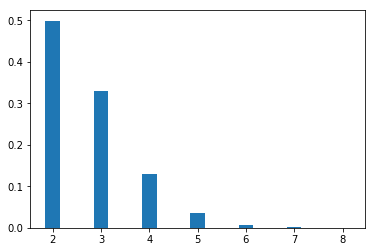

In [2]:
# need next line to get figure to appear in Jupyter
%pylab inline
import matplotlib.pyplot as plt#plot

numBins = np.max(trials) - np.min(trials) + 1
plt.hist(trials, bins=numBins, normed=True, align='left', rwidth=0.3, range=(2, 2 + numBins))
# plot.grid = True

### 4.4
You have a basket of $n$ assets. The asset returns are multivariate normal with zero mean. Correlation between any pair of assets is 1/2. What is the probability that $k$ of the assets will have positive return?

### 3.10
A stick is broken randomly into 3 pieces. What is the probability of the pieces being able to form a triangle?

### 3.11
A stick is broken randomly into two pieces. The larger piece is then broken randomly into two pieces. What is the probability of the pieces being able to form a triangle?

### 5.10
Suppose there are 36 students in the QFRM program, each assigned a unique integer from 1 to 36. Thirty-six quarters are laid out on a table in a row, heads up. Each student goes to the table, and if they are assigned the number $n$, they turn over the $n$th coin, the $2n$th coin, and so on. So, for example, the student who is assigned 15 will turn over the 15th and 30th coins. When everyone is done, how many tails are showing?

# Coin problem two heads and two tills

Populating the interactive namespace from numpy and matplotlib


2.3976999999999999

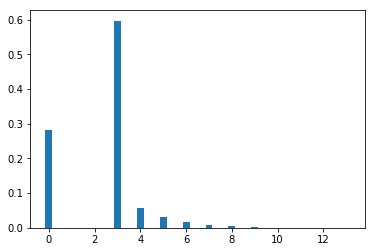

In [2]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
class coin():
    def play(self):
        winnings = 0
        two_of_same_seen = False
        while True:
            if two_of_same_seen:
                if winnings >= 3:
                    return winnings
                if np.random.randint(4)==0:
                    return 0
            else:
                two_of_same_seen = np.random.randint(2)==0
            winnings += 1
game = coin()
num_trials = 10000
trials = [game.play() for i in range(num_trials)]
num_bins = np.max(trials) - np.min(trials) +1
plt.hist(trials,bins=num_bins,normed=True,align='left',rwidth=0.3,range=(0,num_bins))
np.mean(trials)
    